Carga de dataset

In [1]:
import pandas as pd
import os, math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_dataset(path,file):
    csv_path = os.path.join(path,file)
    return pd.read_csv(csv_path)

In [3]:
PATH = "../Fraude en TC/"
DATASET = "fraude_tc.csv"

In [4]:
df  = load_dataset(PATH,DATASET)

Procesos:
- Tomar una muestra que sea balanceada entre "fraude" y "no fraude".
- Escalado de los datos (RobustScaler)
- Aplicar PCA
- Aplicar modelo de clasificacion

In [26]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.preprocessing import RobustScaler

from sklearn.metrics import accuracy_score



In [6]:
# Count of fraud rows
df['fraud'].value_counts()[1]

87403

Muestra balanceada

In [7]:
sample = df.sample(frac=1, random_state=42)

fraud_count = df['fraud'].value_counts()[1]

fraud_df = sample.loc[df['fraud'] == 1]
non_fraud_df = sample.loc[df['fraud'] == 0][:fraud_count]

df_new = pd.concat([fraud_df, non_fraud_df]).sample(frac=1, random_state=42) 

In [8]:
df_new.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
129965,45.079666,2.799201,4.102317,1.0,0.0,0.0,1.0,1.0
973822,8.885663,0.061915,5.254538,1.0,0.0,0.0,1.0,1.0
70240,14.355409,2.084036,0.225479,1.0,1.0,0.0,0.0,0.0
2890,10.434187,1.028055,0.223462,1.0,0.0,0.0,0.0,0.0
634383,9.097503,0.342701,0.819132,1.0,0.0,0.0,0.0,0.0
122865,40.012254,1.004963,5.941479,1.0,0.0,0.0,1.0,1.0
656924,3.877341,0.734906,1.162631,1.0,1.0,0.0,1.0,0.0
915499,127.296868,2.992752,7.348501,1.0,0.0,0.0,1.0,1.0
41165,0.543940,0.110428,0.729265,0.0,0.0,0.0,1.0,0.0
383781,11.177367,0.984917,10.942429,1.0,0.0,0.0,1.0,1.0


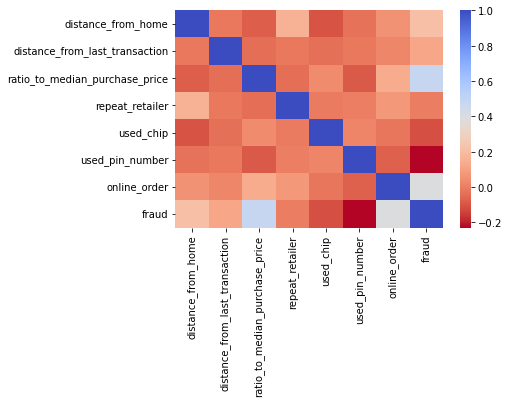

In [9]:
sub_sample_corr = df_new.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r')
plt.show()

Separación de train y test

In [10]:
X = df_new.drop(columns = ['fraud'])
y = df_new['fraud']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Classifiers

In [12]:
classifiers = {
    "LogisiticRegression": LogisticRegression(solver='lbfgs', max_iter=500),
    "KNearest": KNeighborsClassifier(),
    # "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [13]:
# Scaler
rob_scaler = RobustScaler()

In [14]:
X = rob_scaler.fit_transform(X_train)

In [15]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 97.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score


In [19]:
knn = KNeighborsClassifier(n_neighbors=3)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_predict = knn.predict(X_test)

In [28]:
print("Accuracy:",accuracy_score(y_test, y_predict))

Accuracy: 0.9684800640695612
